In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Configure API key
quandl.ApiConfig.api_key='DRRsNwu_RkcQiznZHKB3'

In [3]:
# Importing the Federal Reserve Economic Data \"Natural Rate of Unemployment\" variable.\n",
data = quandl.get('FED/SUBLPDMHS_XWB_N_Q')

In [4]:
data.head()

,Value
Date,
2018-03-31,10.0
2018-06-30,5.3
2018-09-30,-13.3
2018-12-31,-12.0
2019-03-31,-1.7


In [5]:
# Plot the data using matplotlib
plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

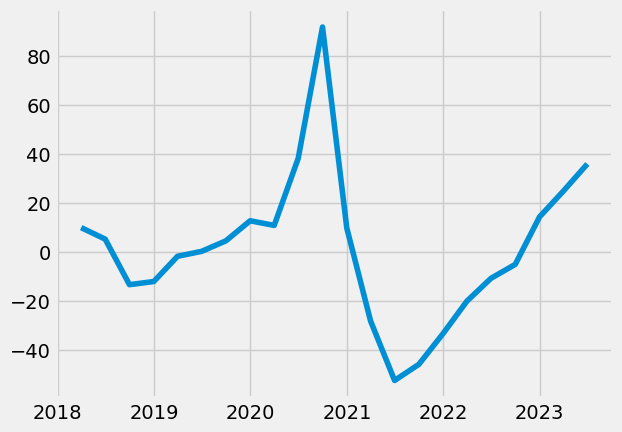

In [6]:
plt.plot(data)

In [7]:
# Reset index so that you can use the \"Date\" column as a filter
data_2 = data.reset_index()

In [8]:
data_2.head()

,Date,Value
0,2018-03-31,10.0
1,2018-06-30,5.3
2,2018-09-30,-13.3
3,2018-12-31,-12.0
4,2019-03-31,-1.7


In [9]:
data_sub = data_2.loc[(data_2['Date'] >= '2018-06-30') & (data_2['Date'] < '2022-12-31')]

In [10]:
# Set the \"Date\" column as the index\n",
from datetime import datetime
data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from \"Date.
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the \"Date\" column.
data_sub.head()

,Value
datetime,
2018-06-30,5.3
2018-09-30,-13.3
2018-12-31,-12.0
2019-03-31,-1.7
2019-06-30,0.3


In [11]:
# Check for duplicates
dups = data_sub[data_sub.duplicated()]
dups.sum()

Value    0.0
dtype: float64

In [15]:
dups # no duplicates found

,Value
datetime,


In [16]:
# Decompose the time series using an additive model\n",
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

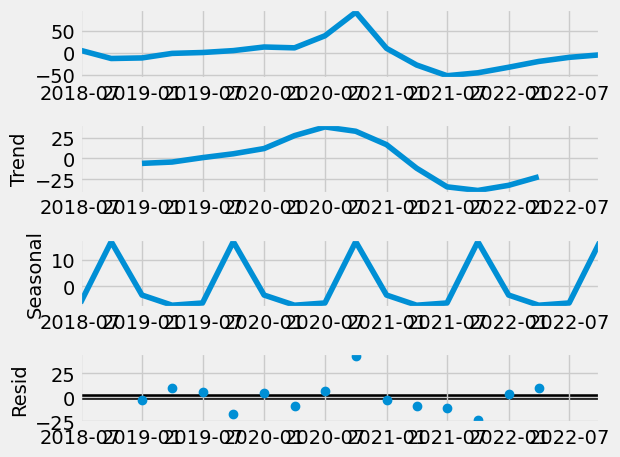

In [14]:
# Plot the separate components\n",
decomposition.plot()
plt.show()